In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy.ma as ma
import os

## SMURF performance on protein

In [2]:
results_dir = "data_for_SMURF_figures"

aucs = {}
fam_names = {}
num_fams = 190

date ="9_25"
choices = ["nobasicalign_0.05_highest", "noevolve_0.05_highest"]            
for mode in choices:
    aucs[mode], _, fam_names[mode] = pickle.load(open(f"{results_dir}/{date}_{mode}","rb"))
    print(f"{mode} found {len(fam_names[mode])} families")
    aucs[mode] = [ [_] for _ in aucs[mode]]
    
date ="9_26"
choices = ["pseudo_0.05_highest"]        
for mode in choices:
    aucs[mode], _, fam_names[mode] = pickle.load(open(f"{results_dir}/{date}_{mode}","rb"))
    print(f"{mode} found {len(fam_names[mode])} families")
    aucs[mode] = [ [_] for _ in aucs[mode]]  
        
date ="9_15_test_set"
choices = ["Gremlin_0.05_64_G4_no_0.0_0.0", "EvolveMRF_0.05_highest_MM_no_0.3_0.9"]          
for mode in choices:  
    aucs[mode], _, fam_names[mode] = pickle.load(open(f"{results_dir}/{date}_{num_fams}_{mode}","rb"))
    print(f"{mode} found {len(fam_names[mode])} families")
    aucs[mode] = [ [_] for _ in aucs[mode]]


nobasicalign_0.05_highest found 193 families
noevolve_0.05_highest found 193 families
pseudo_0.05_highest found 193 families
Gremlin_0.05_64_G4_no_0.0_0.0 found 193 families
EvolveMRF_0.05_highest_MM_no_0.3_0.9 found 193 families


In [3]:
nickname = {}
nickname["EvolveMRF_0.05_highest_MM_no_0.3_0.9"]="SMURF"
nickname["pseudo_0.05_highest"]="Pseudo-alignment"
nickname["nobasicalign_0.05_highest"] = "No BasicAlign"
nickname["noevolve_0.05_highest"] = "Constant Query"
nickname['Gremlin_0.05_64_G4_no_0.0_0.0'] ="MLM-GREMLIN"

In [4]:
all_fams = fam_names['Gremlin_0.05_64_G4_no_0.0_0.0']
md ={}
col_names = []
first = True
method_list = aucs.keys()
for fam in all_fams:
    md[fam]=[]
for fam in all_fams:
    for method in method_list:
        if fam in fam_names[method]:
            ca=aucs[method][fam_names[method].index(fam)]
            if ca == None:
                md[fam].append(ca)
            else:
                md[fam].append(ca[-1])
        else: 
            md[fam].append(np.nan)
        if first: col_names.append(f"{method}")
    
    first = False
    
df = pd.DataFrame.from_dict(md, orient='index', columns=[nickname[_] for _ in col_names])

In [5]:
df

,No BasicAlign,Constant Query,Pseudo-alignment,MLM-GREMLIN,SMURF
3F6GA,0.569043,0.600973,0.101949,0.571154,0.604625
1F86A,0.709216,0.723462,0.251647,0.700070,0.708856
3F9XA,0.495588,0.525290,0.019519,0.549650,0.536528
2P3WA,0.581595,0.655725,0.048001,0.670808,0.659639
3FDXA,0.757170,0.715756,0.553608,0.723333,0.715888
...,...,...,...,...,...
1Z0WA,0.646639,0.665448,0.230466,0.648200,0.660093
4YQDA,0.560890,0.581693,0.030059,0.555989,0.576001
1ZAVA,0.599028,0.606121,0.453132,0.562680,0.611816
3ZJAA,0.814169,0.856963,0.613516,0.870697,0.865204


In [6]:
# Names of test families
s=", ".join(df.index)
print(s)
print(len(df.index))

3F6GA, 1F86A, 3F9XA, 2P3WA, 3FDXA, 5FH7A, 2FIUA, 1FM0D, 1FM0E, 3KZPA, 3FPNB, 4FVGA, 1FXLA, 4G0XA, 3G13A, 1G2RA, 3G2EA, 3NO0A, 4G4KA, 1G6XA, 3G9KF, 1GCIA, 3U2UA, 4GJZA, 2GMYA, 1GPRA, 3GPKA, 1N62C, 4GWBA, 3H0NA, 3LYHA, 4HYLA, 3H5JA, 3H7OA, 4H8EA, 1H99A, 2HA8A, 2HBAA, 2HBWA, 2HC8A, 4XPCA, 3HMCA, 5HMLA, 3HRLA, 3HY3A, 2HZQA, 2JFRA, 5I32A, 2I6HA, 3IBZA, 2ICUA, 1IIBA, 2IIHA, 5IJAA, 3IP0A, 2NWRA, 1IQ4A, 2IQYA, 3IS6A, 3ISRA, 3IT4A, 3IT4B, 3ITQA, 5ITQA, 3IUGA, 2IXDA, 3OCMA, 2IZ6A, 3PVEA, 1JKEA, 1JL1A, 2JLIA, 3JXGA, 1K4IA, 4LFLA, 2OMLA, 3K8UA, 1M93B, 1MPGA, 3KEWA, 1KHYA, 1KNMA, 2NUHA, 3L00A, 3L51A, 3L60A, 1LFPA, 3LF9A, 1LOPA, 3LQBA, 4LQ4A, 4LWRA, 1LYQA, 4M0NA, 3M7AA, 4ME3A, 2MHRA, 3MHXA, 3MMHA, 4MU3A, 1MVLA, 3MVUA, 1X1OA, 4NBXA, 3NFDA, 3NO4A, 2NRKA, 2NRRA, 1NS5A, 4NTKA, 3NUAA, 1NZ0A, 2O70A, 2OFKA, 2OLMA, 2OMKA, 4ONMA, 3PN3A, 1WDJA, 2OYAA, 1OZ9A, 1TQ5A, 2PFRA, 4PGRA, 2PLIA, 3PO8A, 3POJA, 4PUIA, 3PYWA, 3Q46A, 3Q64A, 2Q7SA, 4QDNA, 2QF4A, 1QG8A, 2QIFA, 2QIPA, 2VTCA, 2QQ4A, 1R5LA, 1YB0A, 1RSSA, 1RV9A,

In [7]:
training_fams = []
data = np.load("data_unalign.npz", allow_pickle=True)
for n,x in enumerate(data.keys()):
    test_fams.append(x)
    if n == 189: break
s=", ".join(training_fams)
print(s)
print(len(training_fams))

3A0YA, 4ACIA, 3AH7A, 5A62A, 2A4VA, 1A3AA, 3A35A, 5A35A, 3GM5A, 2A67A, 3A6SA, 1NNHA, 4A7UA, 4A7WA, 5ECCA, 5A89A, 5C0PA, 2ABWA, 2A9SA, 4JS8A, 3AABA, 3AAYA, 4C5KA, 4ABLA, 3ACXA, 1AE9A, 4AFFA, 4AFHA, 3AGYA, 1M2KA, 4AIVA, 4AIWA, 1AKOA, 3AK8A, 3AKBA, 3ALUA, 2AMHA, 2AN1A, 2ANRA, 2ANXA, 4WTPA, 2APJA, 2FBNA, 4APXB, 2AQ6A, 1ATZA, 4ATEA, 4AVRA, 3AWUA, 4AY0A, 2B0AA, 1EUWA, 4LSCA, 5B3PA, 2B5GA, 2HQSC, 3B8BA, 4B8EA, 2B94A, 1BD8A, 3BEDA, 3BEMA, 3SY1A, 2BFWA, 5C1EA, 4BH5A, 2C2IA, 2BK8A, 2BKMA, 2BKXA, 4LXQA, 3BM7A, 2BOUA, 3BP3A, 3BPKA, 5C90A, 3KG9A, 3BR8A, 3BT5A, 1BUOA, 2BV5A, 3BWUD, 3BWUF, 1I4JA, 1BXYA, 1BYRA, 3BY8A, 5BY4A, 2BZ1A, 4N0KA, 3C1QA, 4C24A, 3C37A, 3C4BA, 2C5QA, 4C6AA, 4C6SA, 2C71A, 2C8MA, 2C92A, 1K7KA, 5CAJA, 3CCDA, 3CCGA, 5CEGB, 1WPNA, 1CFBA, 1CHDA, 2GGCA, 3CH0A, 3LULA, 3MN2A, 4EWFA, 3NREA, 3CI3A, 4NNOA, 3CNVA, 2EGZA, 1COJA, 1COZA, 3CQ1A, 5CQXA, 1KQPA, 1CTFA, 1CUKA, 2CVEA, 1CXQA, 3LF5A, 3CXKA, 5CX7A, 3CZXA, 1D0QA, 3D01A, 3D03A, 4D05A, 4D74A, 4DBFA, 2D4XA, 3LTJA, 4DAMA, 3DBOB, 3DD6A, 1H72C,

In [8]:
df.sort_values(by="MLM-GREMLIN")

,No BasicAlign,Constant Query,Pseudo-alignment,MLM-GREMLIN,SMURF
4X9JA,0.044375,0.063519,0.011197,0.052338,0.074768
2YN5A,0.146814,0.154346,0.018495,0.144551,0.135183
3H0NA,0.327493,0.318003,0.000000,0.342403,0.313908
4ONMA,0.456585,0.467897,0.017906,0.375683,0.450211
1R5LA,0.375468,0.382595,0.075855,0.400847,0.389314
...,...,...,...,...,...
3HRLA,0.802404,0.794565,0.658678,0.817744,0.807055
1GCIA,0.839024,0.854045,0.033237,0.830546,0.849038
1IIBA,0.797763,0.854957,0.736874,0.841775,0.849466
1NS5A,0.860020,0.851900,0.028819,0.854638,0.864520


In [9]:
def frac_positive(L):
    return(len([_ for _ in L if _>0])/len(L))

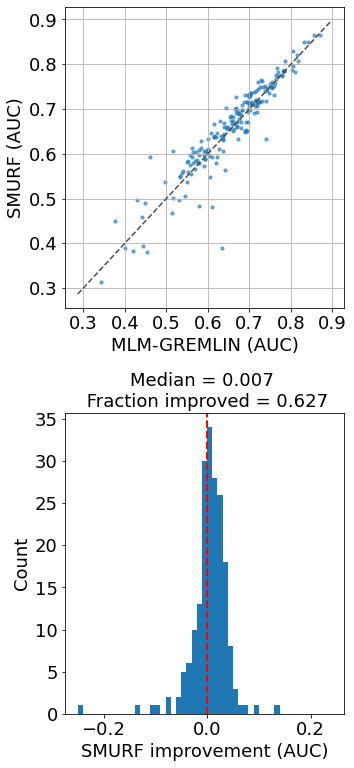

In [10]:
plt.rcParams.update({'font.size': 18})
to_plot ="SMURF"
fig, ax = plt.subplots(2,1, figsize=(5,13))
fig.subplots_adjust(hspace=.35)
i=0
df.drop(["4X9JA","2YN5A"]).plot.scatter('MLM-GREMLIN', to_plot, ax=ax[i], s =10, alpha = .6) #, c = "max_len", cmap = "bwr")
lims=(min(ax[i].get_xlim()[0], ax[i].get_ylim()[0]), max(ax[i].get_xlim()[1], ax[i].get_ylim()[1]))
ax[i].plot(lims, lims, ls="--", c=".3")
#ax[i].set_title("Protein Contact Accuracy",fontsize= 18)
ax[i].set_xticks(np.arange(.3,.9,.1))
ax[i].set_yticks(np.arange(.3,.9,.1))
ax[i].set_xlabel("MLM-GREMLIN (AUC)");
ax[i].set_ylabel("SMURF (AUC)");
ax[i].grid()

n=1
improvements = [df[to_plot][_] - df['MLM-GREMLIN'][_] for _ in range(len(df[to_plot]))]
fi= frac_positive(improvements)
ax[n].hist(improvements,bins=np.arange(-.25,.25,.01));
ax[n].axvline(x=0.0, color='r', linestyle='dashed', linewidth=2)
med= np.median([df[to_plot][_] - df['MLM-GREMLIN'][_] for _ in range(len(df[to_plot]))])
ax[n].set_title(f"Median = {np.round(med,3)} \n Fraction improved = {np.round(fi,3)}", fontsize= 18);
ax[n].set_xlabel("SMURF improvement (AUC)");
ax[n].set_ylabel("Count");
plt.savefig("figures/SMURF_protein.svg", bbox_inches='tight')

## find best and worst examples and visualize

In [11]:
df["improvement"] = df["SMURF"]-df['MLM-GREMLIN']

In [12]:
df.sort_values(by="improvement")

,No BasicAlign,Constant Query,Pseudo-alignment,MLM-GREMLIN,SMURF,improvement
3LF9A,0.170708,0.405106,0.282374,0.633985,0.389378,-0.244606
2IZ6A,0.439833,0.510125,0.089136,0.610509,0.480493,-0.130016
2HZQA,0.613358,0.609515,0.036288,0.739186,0.632266,-0.106920
2X8XX,0.409079,0.492411,0.031243,0.577665,0.483708,-0.093957
2XTYA,0.524192,0.582307,0.050978,0.640231,0.564815,-0.075416
...,...,...,...,...,...,...
1OZ9A,0.684825,0.705448,0.543791,0.643293,0.703097,0.059804
2OLMA,0.457176,0.483305,0.052345,0.429342,0.496505,0.067163
4ONMA,0.456585,0.467897,0.017906,0.375683,0.450211,0.074528
3L00A,0.496893,0.632295,0.396529,0.517043,0.607103,0.090060


In [13]:
worst = ['3LF9A','2IZ6A','2HZQA']
best = ['1Y6ZA','3L00A','4ONMA']
special_fams = best+worst

In [14]:
auc_gremlin = {}
auc_evolve = {}
auc_evolve_pid ={}

contacts_true = {}
contacts_mask = {}
contacts_gremlin = {}
contacts_evolve = {}

aln_hhblits = {}
aln_evolve = {}

date = "9_19"
mode="TRUE"
fam_dir="data_for_SMURF_figures/individual_fams"
for fam in special_fams:
    try:
        t_aln, t_contacts,t_contacts_mask = pickle.load(open(f"{fam_dir}/{date}_{fam}_{mode}","rb"))
        aln_hhblits[fam]=t_aln
        contacts_true[fam]=t_contacts
        contacts_mask[fam]=t_contacts_mask
    except: 
        print(f"did not find {mode} results for {fam}")
        
date = "9_19"
mode = 'EvolveMRF_0.05_highest_MM_no_0.3_0.9'
for fam in special_fams:
    try:
        auc_evolve[fam], aln_evolve[fam], contacts_evolve[fam] = pickle.load(open(f"{fam_dir}/{date}_{fam}_{mode}","rb"))
    except: 
        print(f"did not find {mode} results for {fam}")
        
date = "9_19"
mode = 'Gremlin_0.05_64_G4_no_0.0_0.0'
for fam in special_fams:
    try:
        auc_gremlin[fam], _, contacts_gremlin[fam] = pickle.load(open(f"{fam_dir}/{date}_{fam}_{mode}","rb"))
    except: 
        print(f"did not find {mode} results for {fam}")

In [15]:
def ppv(cutoff, con, con_true, min_d):
    """
    min_d -- pick contacts with minimum distance to diagonal
    """

    pos = np.argwhere(np.triu(con, k=1) >= cutoff)
    l = len(pos)
    n = 0
    for p in pos:
        if con_true.item(tuple(p)) == 1:
            n += 1
        else:
            pass

    return n / l

min_d = 6


def con_auc(true, pred, mask=None, thresh=0.01):
    '''compute agreement between predicted and measured contact map'''
    if mask is not None:
        idx = mask.sum(-1) > 0
        true = true[idx, :][:, idx]
        pred = pred[idx, :][:, idx]
    eval_idx = np.triu_indices_from(true, 6)
    pred_, true_ = pred[eval_idx], true[eval_idx]
    L = (np.linspace(0.1, 1.0, 10) * len(true)).astype("int")
    sort_idx = np.argsort(pred_)[::-1]
    acc = [(true_[sort_idx[:l]] > thresh).mean() for l in L]
    return np.mean(acc)


class contacts_compare():

    def __init__(self, fam, contacts_s, contacts_g, contacts_true, mask, print_auc=False):
        self.print_auc = print_auc
        self.fam = fam
        self.mask = mask
        # get Gremlin contacts
        self.contacts_g = contacts_g
        self.L = len(self.contacts_g)
        self.contacts_g = ma.masked_array(self.contacts_g, self.mask)

        # get SMURF contacts
        self.contacts = contacts_s
        self.contacts = ma.masked_array(self.contacts, self.mask)

        # get true contacts
        self.contacts_t = contacts_true

        self.contacts_t = ma.masked_array(self.contacts_t, self.mask)
        self.resid1, self.resid2 = np.argwhere(contacts_true == 1).T

        self.ppv_E = []
        self.ppv_G = []
        for l in range(1, 2 * self.L):
            self.set_cutoff(l)
            self.ppvs = self.get_ppv()
            self.ppv_E.append(self.ppvs['SMURF'])
            self.ppv_G.append(self.ppvs['Gremlin'])
        self.set_cutoff(self.l)

    def auc(self):
        return {'EMRF': con_auc(pred=ma.getdata(self.contacts), true=ma.getdata(self.contacts_t), mask=self.mask),
                'Gremlin': con_auc(pred=ma.getdata(self.contacts_g), true=ma.getdata(self.contacts_t), mask=self.mask)}

    def set_cutoff(self, l):  # pick the top l contacts
        self.l = l
        self.cutoff = - \
            ma.sort(-self.contacts[np.triu_indices(self.L, k=min_d)])[self.l]
        self.cutoff_g = - \
            ma.sort(-self.contacts_g[np.triu_indices(self.L, k=min_d)])[self.l]

        # get contact pair indices, grouped in to true positives(tp) and false
        # positives(fp)
        self.con_coords_tp = np.argwhere(np.array((np.triu(self.contacts, k=min_d) > self.cutoff) * (
            self.contacts.mask == False) * (self.contacts_t == 1)) == True).T
        self.con_coords_fp = np.argwhere(np.array((np.triu(self.contacts, k=min_d) > self.cutoff) * (
            self.contacts.mask == False) * (self.contacts_t == 0)) == True).T
        self.con_coords_g_tp = np.argwhere(np.array((np.triu(
            self.contacts_g, k=min_d) > self.cutoff_g) * (self.contacts.mask == False) * (self.contacts_t == 1)) == True)
        self.con_coords_g_fp = np.argwhere(np.array((np.triu(
            self.contacts_g, k=min_d) > self.cutoff_g) * (self.contacts.mask == False) * (self.contacts_t == 0)) == True)
        self.con_coords_g_tp = self.con_coords_g_tp[:, ::-1].T
        self.con_coords_g_fp = self.con_coords_g_fp[:, ::-1].T

    def get_ppv(self):
        return {'SMURF': ppv(self.cutoff, self.contacts, self.contacts_t, min_d),
                'Gremlin': ppv(self.cutoff_g, self.contacts_g, self.contacts_t, min_d)}

    def plot2(self, aln_smurf, aln_hh):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6.5))
        fig.tight_layout()
        # fig.subplots_adjust(wspace=.4)

        ax1.set_aspect(1)
        ax1.scatter(np.concatenate((self.resid1, self.resid2)),
                    np.concatenate((self.resid2, self.resid1)), color=".6")
        ax1.scatter(*self.con_coords_tp, facecolors='none', edgecolors='r',
                    label='SMURF' + '  auc=' + str(np.round(self.auc()['EMRF'], 2)))
        ax1.scatter(*self.con_coords_fp, marker="x", color='r')
        ax1.scatter(*self.con_coords_g_tp, facecolors='none', edgecolors='b',
                    label='MLM-GREMLIN' + '  auc=' + str(np.round(self.auc()['Gremlin'], 2)))
        ax1.scatter(*self.con_coords_g_fp, marker="x", color='b')
        ax1.set_xlabel("Position 1")
        ax1.set_ylabel("Position 2")
        if self.print_auc is True:
            ax1.legend(loc=(.3, -.3))
        else:
            pass

        ax2.set_aspect(2 * self.L)
        ax2.plot(range(1, 2 * self.L), self.ppv_E, color='red', label='SMURF')
        ax2.plot(range(1, 2 * self.L), self.ppv_G,
                 color='blue', label='MLM-GREMLIN')
        ax2.set_ylim([0, 1.0 + .005])
        ax2.set_xlim([0, 2 * self.L])

        ax2.set_xlabel("Top N predictions")
        ax2.set_ylabel("PPV")
        ax2.legend(loc=(.1, .1))
        suptitle = fig.suptitle(self.fam, y=1.01)

        ax3.imshow(aln_smurf[1, ...] - aln_hh[1, ...],
                   cmap="bwr", vmin=-.7, vmax=.7)
        ax3.set_xlabel("Reference position")
        ax3.set_ylabel("Alignment of sequence")

        fig.savefig("figures/" + self.fam + ".pdf", dpi=fig.dpi,
                    bbox_inches='tight', bbox_extra_artists=[suptitle])


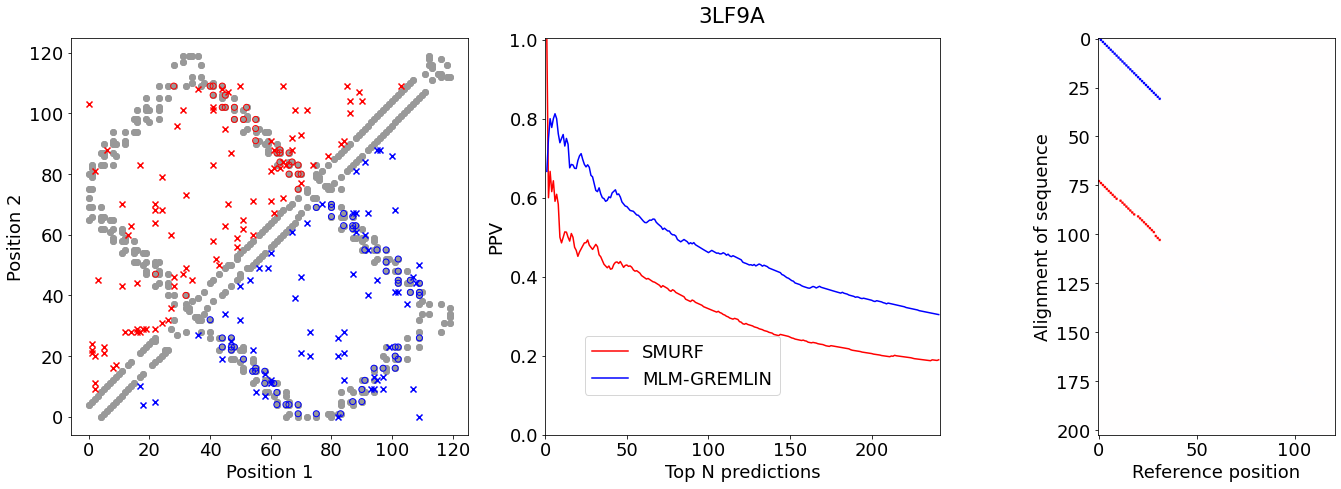

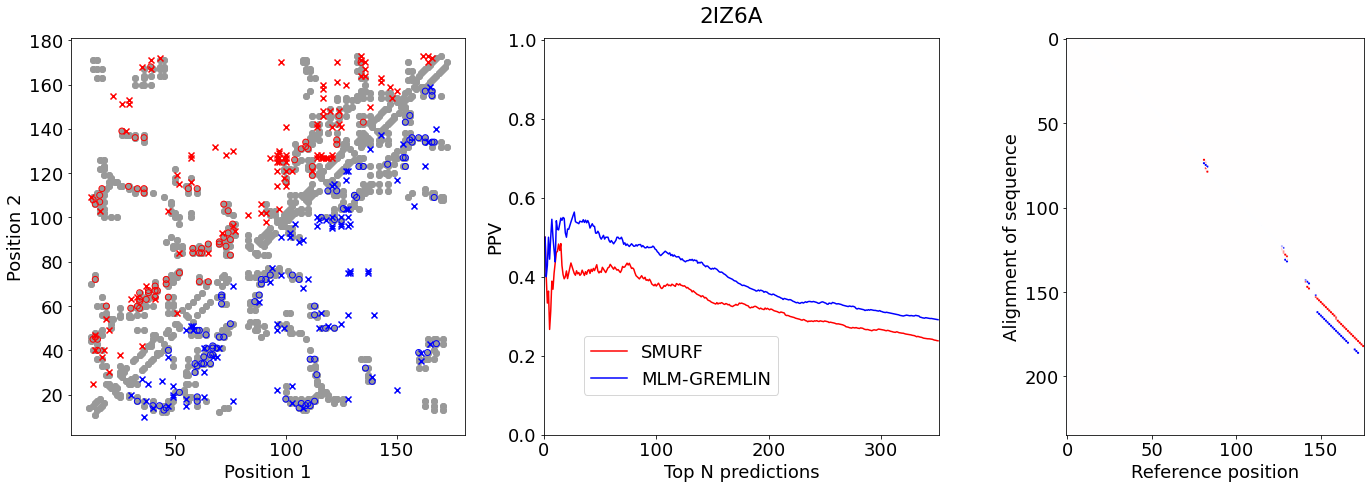

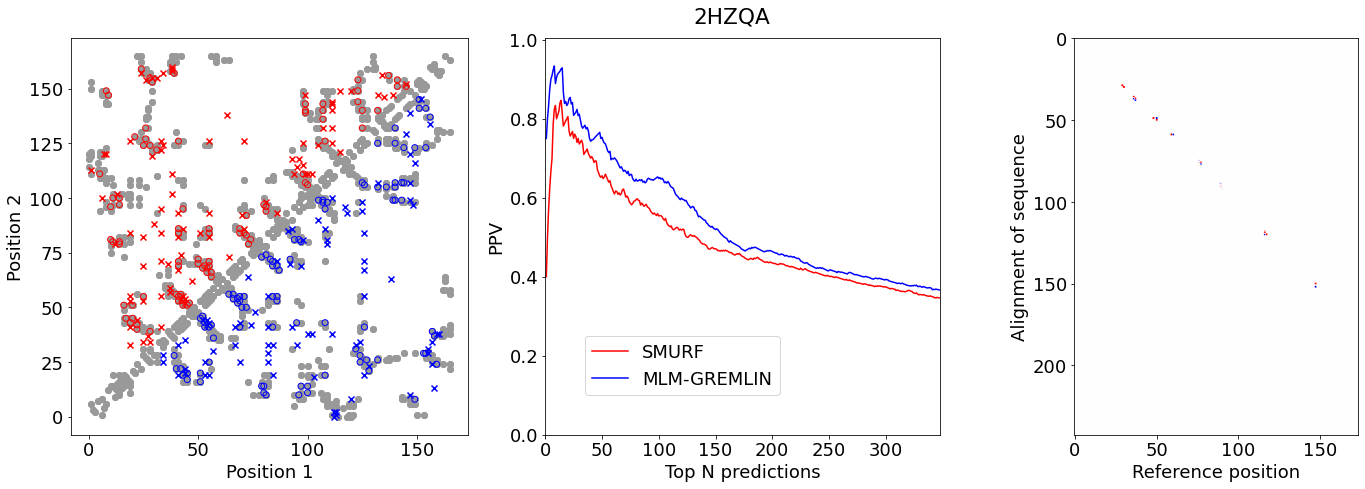

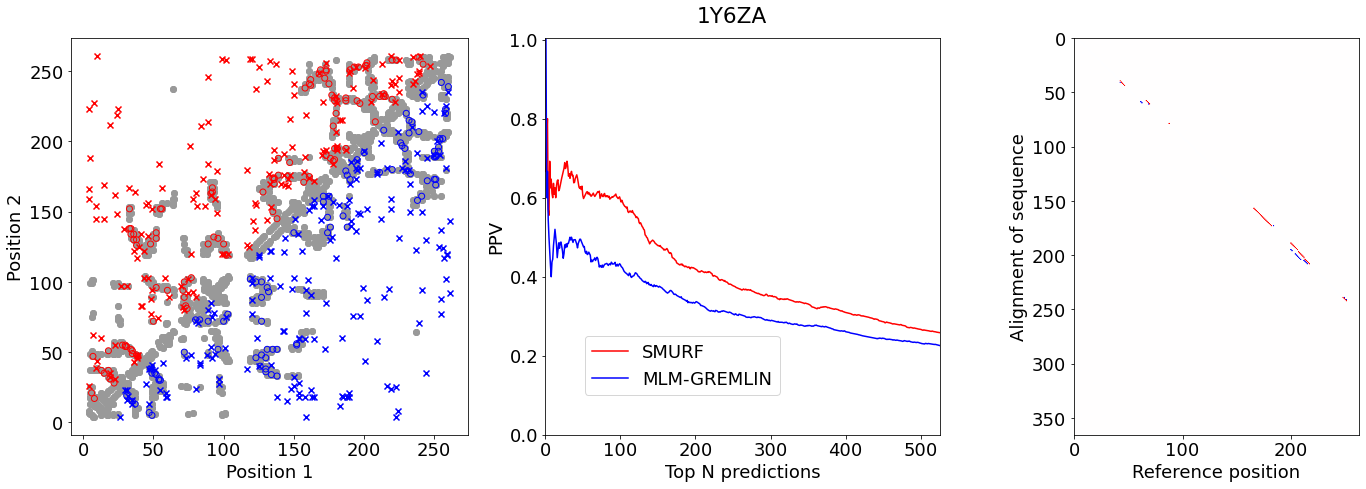

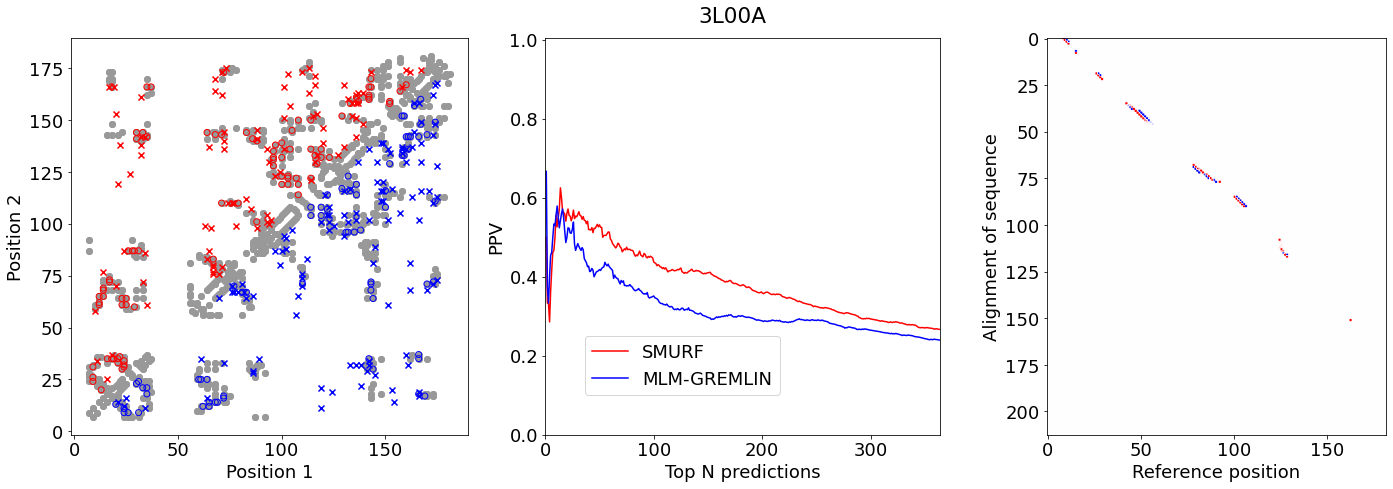

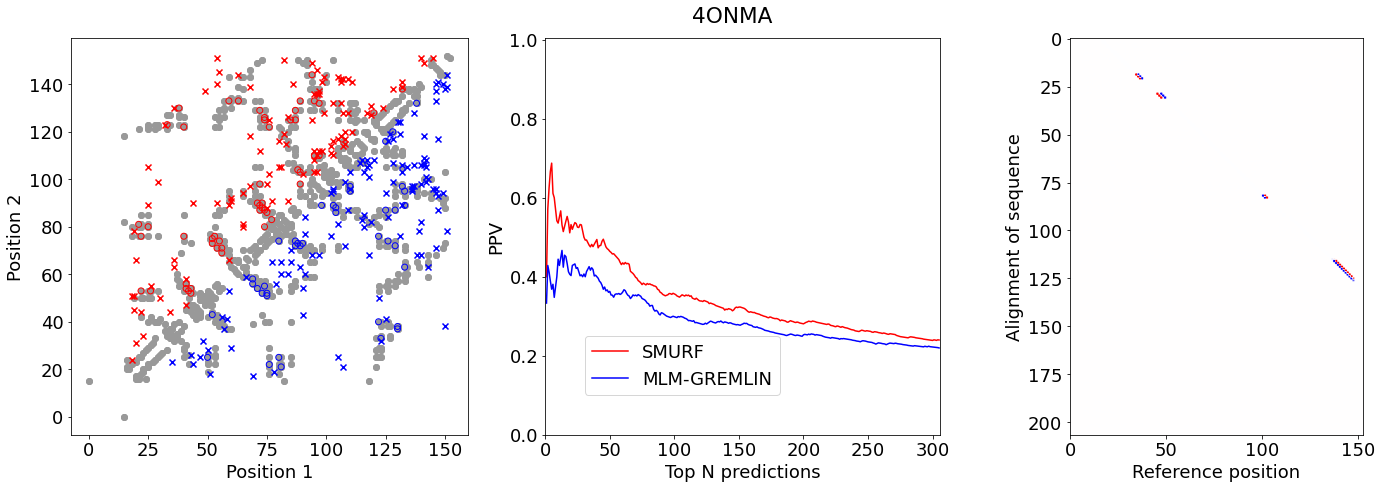

In [16]:
worst = ['3LF9A','2IZ6A','2HZQA']
best = ['1Y6ZA','3L00A','4ONMA']
special_fams = worst + best
for fam in special_fams:
    con = contacts_compare(fam, contacts_evolve[fam], contacts_gremlin[fam], contacts_true[fam], -contacts_mask[fam]+1)
    con.set_cutoff(con.L)
    con.plot2(aln_evolve[fam],aln_hhblits[fam])


## Ablation for protein

MLM-GREMLIN
Constant Query
No BasicAlign
Pseudo-alignment


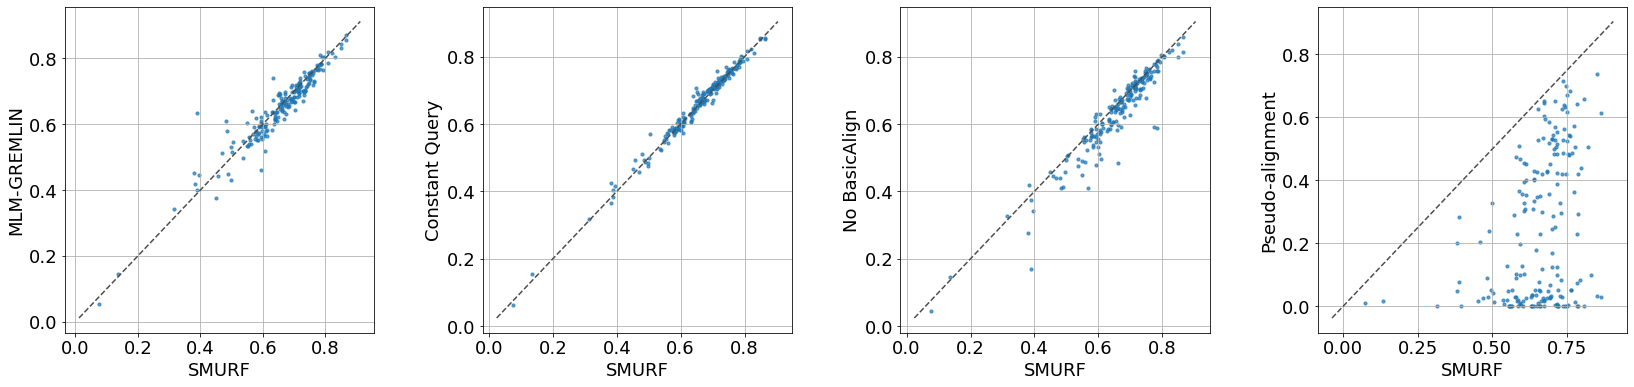

In [17]:
plt.rcParams.update({'font.size': 18})
to_plot =["MLM-GREMLIN","Constant Query", "No BasicAlign", "Pseudo-alignment"]
#titles=["Evolve with changing PID threshold", "Evolve no PID threshold", "Standard"]
    
fig, ax = plt.subplots(1,4, figsize=(28,6))
fig.subplots_adjust(wspace=.35)

i=0
for col in to_plot:
    print(col)
    df.plot.scatter("SMURF", col, ax=ax[i], s =10, alpha = .7) #, c = "max_len", cmap = "bwr")
    if i!=2:
        lims=(min(ax[i].get_xlim()[0], ax[i].get_ylim()[0]), max(ax[i].get_xlim()[1], ax[i].get_ylim()[1]))
    ax[i].plot(lims, lims, ls="--", c=".3")
    ax[i].grid()
    i+=1
plt.savefig("figures/ablation.pdf", bbox_inches='tight')

## SMURF performance on RNA

In [18]:
df= pd.read_csv("data_for_SMURF_figures/rna_table.csv")
df

,Rfam_ID,PDB_ID,SMURF_AUC,MLM-GREMLIN_AUC
0,RF00001,3jq4,0.797591,0.756468
1,RF00010,3q1q,0.827507,0.907904
2,RF00023,3iyq,0.743282,0.801137
3,RF00050,3f2x,0.779651,0.784956
4,RF00059,2gdi,0.782991,0.879638
5,RF00162,4kqy,0.853619,0.760051
6,RF00167,1y26,0.930711,0.809413
7,RF00169,2xxa,0.902143,0.882564
8,RF00174,4gxy,0.735995,0.799431
9,RF00234,2h0z,0.862511,0.816217


In [19]:
print(", ".join(df["Rfam_ID"]))
print(", ".join(df["PDB_ID"]))

RF00001, RF00010, RF00023, RF00050, RF00059, RF00162, RF00167, RF00169, RF00174, RF00234, RF00380, RF00504, RF01734, RF01786, RF01831, RF01852, RF02001
3jq4, 3q1q, 3iyq, 3f2x, 2gdi, 4kqy, 1y26, 2xxa, 4gxy, 2h0z, 3pdr, 3p49, 4enc, 3q3z, 4lvv, 3hl2, 3bwp


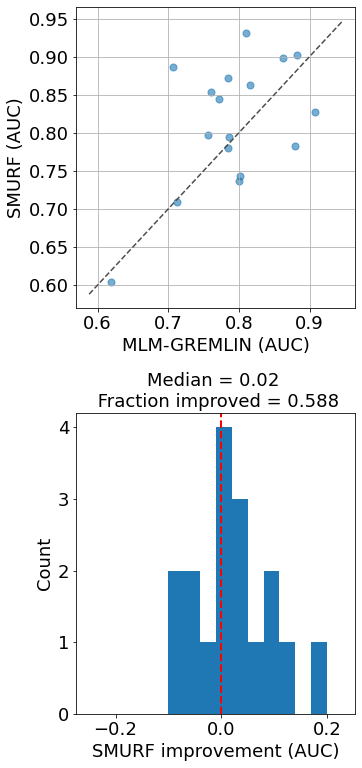

In [20]:
plt.rcParams.update({'font.size': 18})
to_plot ="SMURF_AUC"
fig, ax = plt.subplots(2,1, figsize=(5,13))
fig.subplots_adjust(hspace=.35)
i=0
df.plot.scatter('MLM-GREMLIN_AUC', to_plot, ax=ax[i], s=50, alpha = .6) #, c = "max_len", cmap = "bwr")
lims=(min(ax[i].get_xlim()[0], ax[i].get_ylim()[0]), max(ax[i].get_xlim()[1], ax[i].get_ylim()[1]))
ax[i].plot(lims, lims, ls="--", c=".3")
#ax[i].set_title("RNA Contact Accuracy",fontsize= 18)
#ax[i].set_xticks(np.arange(.3,.9,.1))
#ax[i].set_yticks(np.arange(.3,.9,.1))
ax[i].set_xlabel("MLM-GREMLIN (AUC)");
ax[i].set_ylabel("SMURF (AUC)");
ax[i].grid()

n=1
improvements = [df[to_plot][_] - df['MLM-GREMLIN_AUC'][_] for _ in range(len(df[to_plot]))]
fi= frac_positive(improvements)
ax[n].hist(improvements,bins=np.arange(-.25,.25,.03));
ax[n].axvline(x=0.0, color='r', linestyle='dashed', linewidth=2)
med= np.median([df[to_plot][_] - df['MLM-GREMLIN_AUC'][_] for _ in range(len(df[to_plot]))])
ax[n].set_title(f"Median = {np.round(med,3)} \n Fraction improved = {np.round(fi,3)}", fontsize= 18);
ax[n].set_xlabel("SMURF improvement (AUC)");
ax[n].set_ylabel("Count");
plt.savefig("figures/SMURF_rna.svg", bbox_inches='tight')

## Families with =< 128 seqs

In [21]:
auc = {}
auc["gremlin"] = {}
auc["evolve"] = {}

directory="data_for_SMURF_figures/small_fams"

all_fams = []
for file in os.listdir(directory):
    fam = file[5:10]
    mode = file[11:]
    all_fams.append(fam)

    if mode == "EvolveMRF_0.05_highest_MM_no_0.3_0.9":
        mode = "evolve"
    elif mode == "Gremlin_0.05_64_G4_no_0.0_0.0":
        mode = "gremlin"
    else:
        print(f"confused... not processing {file}") 
        continue
    auc[mode][fam],  _, _ = pickle.load(open(directory+"/"+file, "rb"))



In [22]:
md ={}
methods = ["gremlin","evolve"]
for fam in all_fams:
    md[fam]=[]
    for mode in methods:
        try:
            md[fam].append(auc[mode][fam])
        except:
            md[fam].append(np.nan)
   
   
df = pd.DataFrame.from_dict(md, orient='index', columns=["MLM-GREMLIN","SMURF"])

In [23]:
s=", ".join(df.index)
print(s)

2OBPA, 2CULA, 4U12A, 2CZ4A, 2BSYA, 2NZ7A, 2Y39A, 4TXWA, 4EMTA, 2O8QA, 4DOVA, 2ASKA, 1OXJA, 2XSKA, 2XOMA, 3EOIA, 1PBYA, 2D1LA, 3LWCA, 4EGDA, 2JJSC, 3M7OA, 2O8LA, 2CXHA, 4EHCA, 3ER7A, 2O6PA, 2XUVA, 2B82A, 2BO9B, 2NQ3A, 1PBYC, 3EGAA, 4DM5A, 4TX5A, 2XYQA, 2BL8A, 2AR5A, 1OQ1A, 2J97A, 3EIPA, 2JKSA, 4DKKA, 2CY3A, 2CIWA, 4DYQA, 2BKFA, 3LY7A, 2D48A, 2CXKA, 2D68A, 4E6FA, 2JH1A, 3EA6A, 2CXYA, 4EFOA, 4EFPA, 2CKXA, 2ODAA, 1P57A, 2BJQA, 2AUWA, 2CJTA, 3LYDA, 2J4XA, 1A1XA, 1ABAA, 2BZVA, 2C8SA, 2O71A, 2CS7A, 2AQ2B, 2C5LC, 2Y0OA, 2XOCA, 3EKIA, 4EPZA, 2O2XA, 2JE3A, 2B4VA, 2J8BA, 4E45E, 4EE6A, 3E9FA, 2B1YA, 2BS2C, 2CX7A, 4TVVA, 2B4HA, 3TGNA, 1OQJA, 4EJRA, 2BRFA, 2J6BA, 2CCQA, 4EKFA, 1OQVA, 2ATZA, 2NZXA


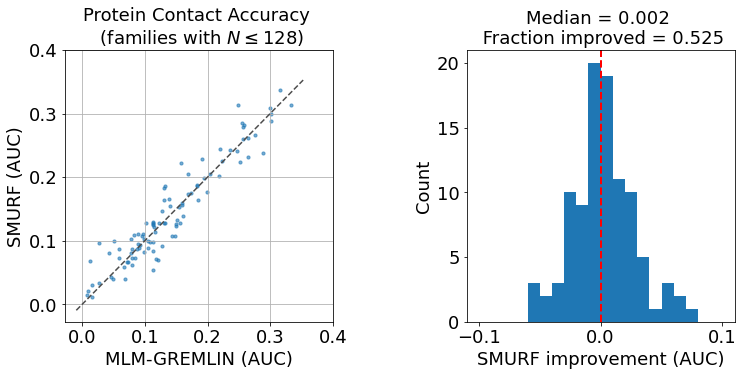

In [24]:
to_plot ="SMURF"
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.subplots_adjust(wspace=.5)
i=0
df.plot.scatter('MLM-GREMLIN', to_plot, ax=ax[i], s =10, alpha = .6) #, c = "max_len", cmap = "bwr")
lims=(min(ax[i].get_xlim()[0], ax[i].get_ylim()[0]), max(ax[i].get_xlim()[1], ax[i].get_ylim()[1]))
ax[i].plot(lims, lims, ls="--", c=".3")
ax[i].set_title("Protein Contact Accuracy \n (families with " +r'$N \leq 128$' + ')',fontsize= 18)
ax[i].set_xticks(np.arange(0,.5,.1))
ax[i].set_yticks(np.arange(0,.5,.1))
ax[i].set_xlabel("MLM-GREMLIN (AUC)");
ax[i].set_ylabel("SMURF (AUC)");
ax[i].grid()

n=1

improvements = [df[to_plot][_] - df['MLM-GREMLIN'][_] for _ in range(len(df[to_plot]))]
fi= frac_positive(improvements)
ax[n].hist(improvements,bins=np.arange(-.1,.11,.01));
ax[n].axvline(x=0.0, color='r', linestyle='dashed', linewidth=2)
med= np.median([df[to_plot][_] - df['MLM-GREMLIN'][_] for _ in range(len(df[to_plot]))])
ax[n].set_title(f"Median = {np.round(med,3)} \n Fraction improved = {np.round(fi,3)}", fontsize= 18);
ax[n].set_xlabel("SMURF improvement (AUC)");
ax[n].set_ylabel("Count");
plt.savefig("figures/small_SMURF_protein.pdf", bbox_inches='tight')